# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


In [4]:
print(weather_api_key)

9a1b9f4208d6947bb27d738463de76b3


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(city_weather["dt"]))

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aripuana
Processing Record 2 of Set 1 | egilsstadir
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | vwawa
Processing Record 6 of Set 1 | urbano santos
Processing Record 7 of Set 1 | verkhniy baskunchak
Processing Record 8 of Set 1 | mejit
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | rundu
Processing Record 13 of Set 1 | ulsteinvik
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | uttarkashi
Processing Record 22 of Set 1 |

In [6]:
city_weather = (requests.get(f"{url}appid={weather_api_key}&q=iqaluit")).json()
city_weather
# city_weather["coord"]["lat"]

{'coord': {'lon': -68.5145, 'lat': 63.7506},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 272.98,
  'feels_like': 267.94,
  'temp_min': 272.98,
  'temp_max': 273,
  'pressure': 1017,
  'humidity': 80,
  'sea_level': 1017,
  'grnd_level': 1012},
 'visibility': 10000,
 'wind': {'speed': 5.14, 'deg': 340},
 'clouds': {'all': 75},
 'dt': 1728953428,
 'sys': {'type': 2,
  'id': 47658,
  'country': 'CA',
  'sunrise': 1728904880,
  'sunset': 1728940693},
 'timezone': -14400,
 'id': 5983720,
 'name': 'Iqaluit',
 'cod': 200}

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aripuana,-9.1667,-60.6333,301.46,49,73,1.29,BR,2024-10-14 19:37:28
1,egilsstadir,65.2653,-14.3948,273.10,93,75,4.63,IS,2024-10-14 19:38:59
2,pisco,-13.7000,-76.2167,291.18,82,0,6.69,PE,2024-10-14 19:39:00
3,hasaki,35.7333,140.8333,296.64,53,78,2.54,JP,2024-10-14 19:39:01
4,vwawa,-9.1167,32.9333,291.08,50,100,1.15,TZ,2024-10-14 19:39:03


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aripuana,-9.1667,-60.6333,301.46,49,73,1.29,BR,2024-10-14 19:37:28
1,egilsstadir,65.2653,-14.3948,273.10,93,75,4.63,IS,2024-10-14 19:38:59
2,pisco,-13.7000,-76.2167,291.18,82,0,6.69,PE,2024-10-14 19:39:00
3,hasaki,35.7333,140.8333,296.64,53,78,2.54,JP,2024-10-14 19:39:01
4,vwawa,-9.1167,32.9333,291.08,50,100,1.15,TZ,2024-10-14 19:39:03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

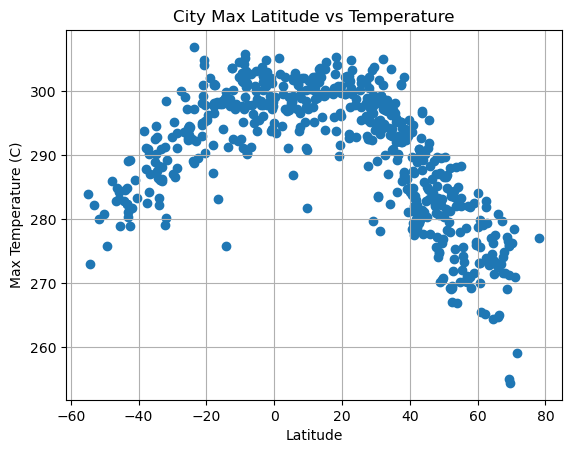

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

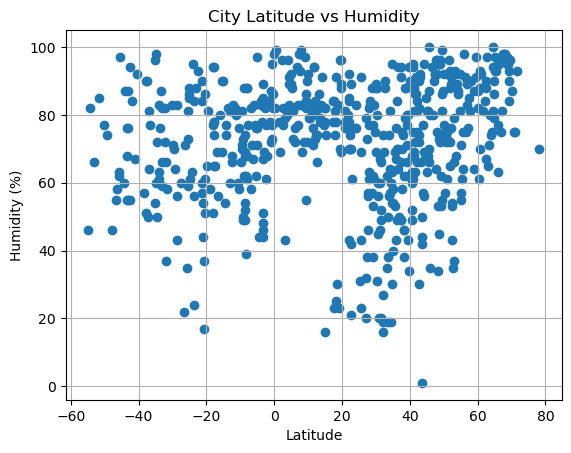

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

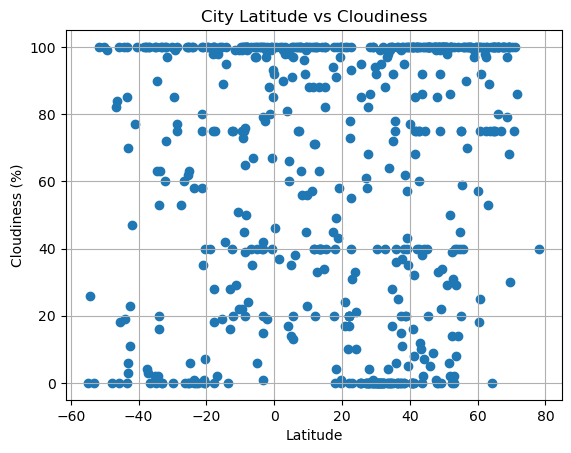

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

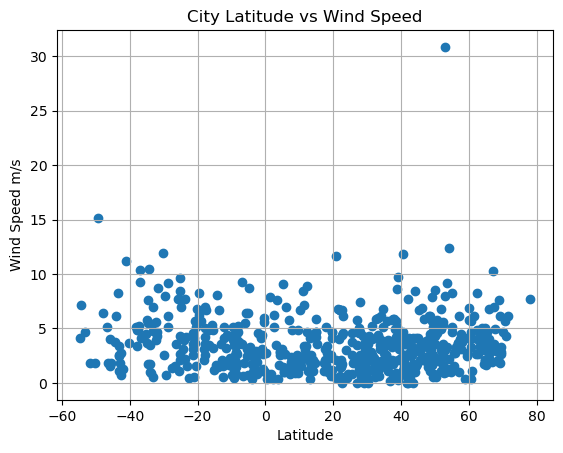

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y): 
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    predicted_values = slope * x + intercept
    
    # Create the plot
    plt.scatter(x, y)
    plt.plot(x, predicted_values, color='red')
    
    # Annotate the line equation and R-squared value
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(line_eq, (min(x), max(predicted_values) - 20), fontsize=12, color='red')
    print(f'The r^2-value is: {rvalue**2:.2f}')
 

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,egilsstadir,65.2653,-14.3948,273.10,93,75,4.63,IS,2024-10-14 19:38:59
3,hasaki,35.7333,140.8333,296.64,53,78,2.54,JP,2024-10-14 19:39:01
6,verkhniy baskunchak,48.2256,46.7217,274.09,34,33,4.02,RU,2024-10-14 19:39:05
7,mejit,10.2753,170.8646,301.64,79,88,6.67,MH,2024-10-14 19:39:06
8,yellowknife,62.4560,-114.3525,282.82,90,75,8.23,CA,2024-10-14 19:39:07


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aripuana,-9.1667,-60.6333,301.46,49,73,1.29,BR,2024-10-14 19:37:28
2,pisco,-13.7000,-76.2167,291.18,82,0,6.69,PE,2024-10-14 19:39:00
4,vwawa,-9.1167,32.9333,291.08,50,100,1.15,TZ,2024-10-14 19:39:03
5,urbano santos,-3.2078,-43.4036,297.84,85,79,2.44,BR,2024-10-14 19:36:40
11,rundu,-17.9333,19.7667,291.51,51,98,2.54,NaN,2024-10-14 19:39:10


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.68


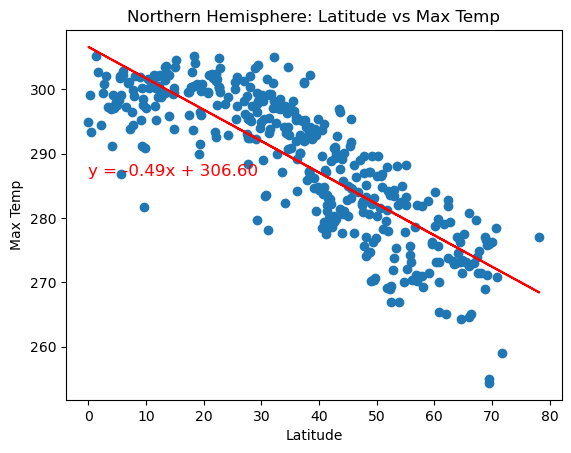

In [18]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Northern Hemisphere: Latitude vs Max Temp')

plt.show()


The r^2-value is: 0.60


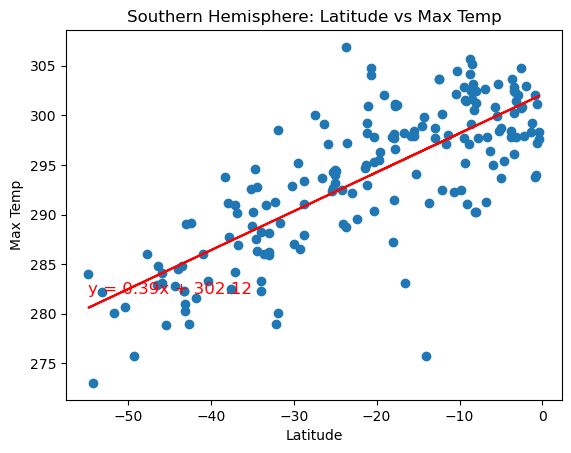

In [19]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Southern Hemisphere: Latitude vs Max Temp')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.01


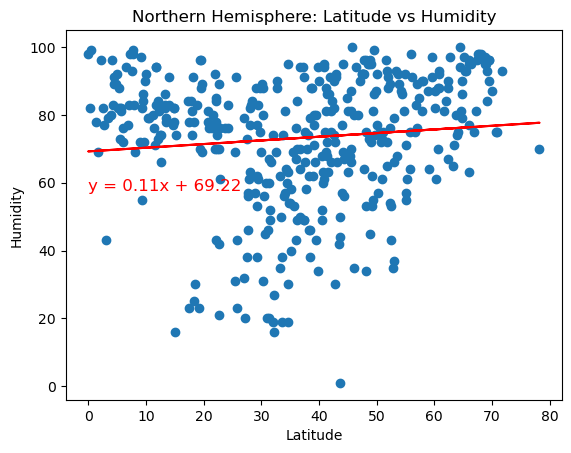

In [20]:
# Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Northern Hemisphere: Latitude vs Humidity')

plt.show()

The r^2-value is: 0.00


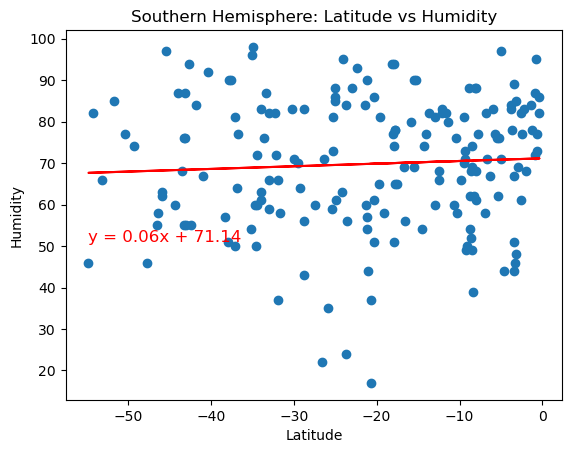

In [21]:
# Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Southern Hemisphere: Latitude vs Humidity')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.02


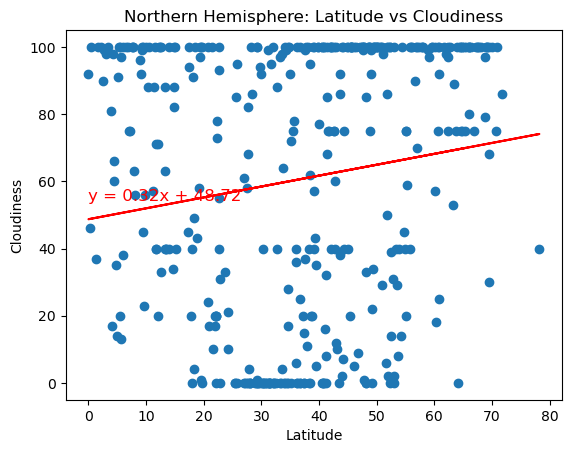

In [22]:
# Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Northern Hemisphere: Latitude vs Cloudiness')

plt.show()

The r^2-value is: 0.03


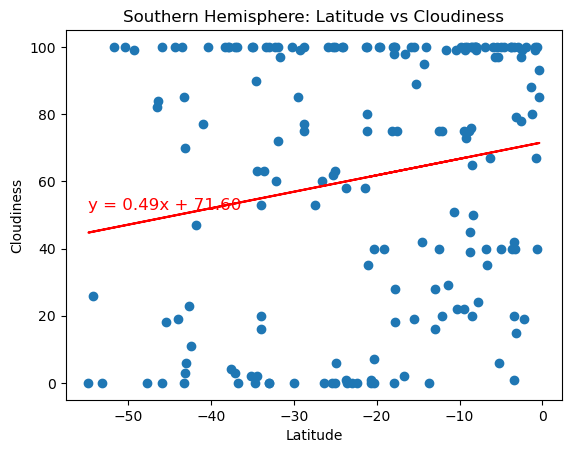

In [23]:
# Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Southern Hemisphere: Latitude vs Cloudiness')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.02


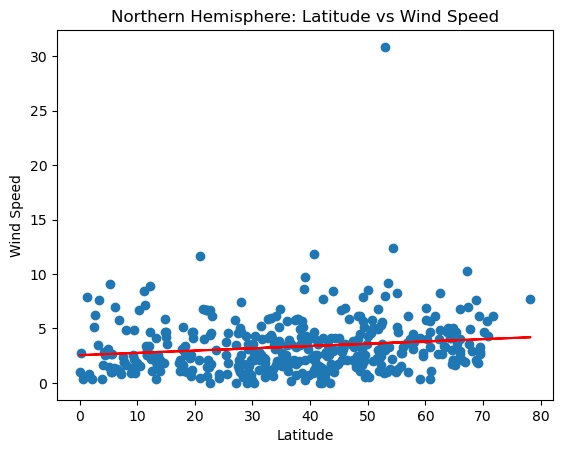

In [24]:
# Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Northern Hemisphere: Latitude vs Wind Speed')

plt.show()

The r^2-value is: 0.05


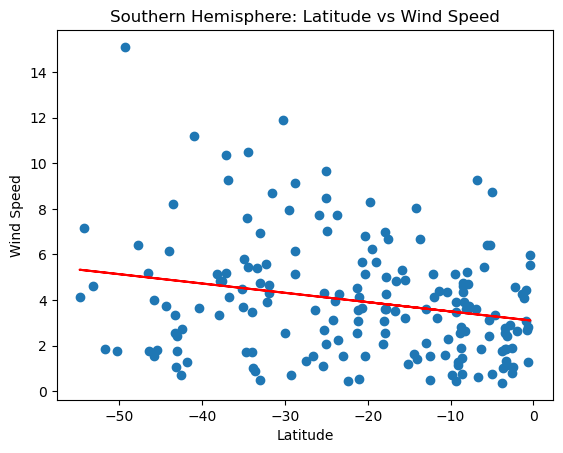

In [25]:
# Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Southern Hemisphere: Latitude vs Wind Speed')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE